In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load the training data

In [2]:
train = pd.read_csv("train_clean.csv",sep = ",", na_values = ["?"])

In [3]:
train.shape

(913489, 54)

## Load the testing data

In [4]:
test = pd.read_csv("test_clean.csv",sep = ",", na_values = ["?"])

In [5]:
test.shape

(261011, 54)

## Load the tuning data

In [6]:
tune = pd.read_csv("tune_clean.csv",sep = ",", na_values = ["?"])

In [7]:
tune.shape

(130477, 54)

## Drop the unused columns for train

In [8]:
list(train)

['Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'inf_adj_salary',
 'salary',
 'Part_Time',
 'Full_Time',
 'White',
 'Hispanic_Latino',
 'NativeAmerican',
 'AfricanAmerican',
 'Asian',
 'Female',
 'Male',
 'Sp_Ed_Teacher',
 'Junior_High_Middle_School',
 'HighSchool',
 'Elementary',
 'Technical',
 'Special_Education',
 'Science',
 'Math',
 'Language',
 'Humanities',
 'Art',
 'sch_zip',
 'DistCode',
 'RCDTS',
 'rcdt',
 'dst_zip',
 'dst_zip_plus4',
 'sch_zip_plus4',
 'Num_Schools',
 'months_employed',
 'pct_emp',
 'fte',
 'dist_exp',
 'state_exp',
 'out_of_state_exp',
 'IL_bac_coll',
 'high_degre_cd',
 'IL_adv_col',
 'low_grade',
 'high_grade',
 'pct_admin',
 'Year',
 'mean inc',
 '2012ADJCPI',
 'EducationECI',
 'Avg Reading',
 'Avg Math',
 'Enrollment ',
 'ln_salary',
 'Outlier']

In [9]:
train = train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','Outlier'])

In [10]:
train.shape

(913489, 50)

## Drop the unused columns for test

In [11]:
test = test.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','Outlier'])

In [12]:
test.shape

(261011, 50)

## Drop the unused columns for tune

In [13]:
tune = tune.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1','Outlier'])

In [14]:
tune.shape

(130477, 50)

## Bining the target variable inf_adj_salary for train

In [15]:
train['Class'] = 0

In [16]:
train.head(10)

,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,Asian,Female,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Class
0,49343.426523,41972.00,0,1,1,0,0,0,0,0,...,0.0,2005,95892.788921,1.175627,100.0,77.378571,78.012500,13566,10.806560,0
1,81318.121165,66903.28,0,1,0,0,0,1,0,0,...,0.0,2004,197917.602996,1.215458,96.2,44.407696,43.970565,847484,11.306124,0
2,92948.132980,76471.70,0,1,1,0,0,0,0,0,...,0.0,2004,95788.436831,1.215458,96.2,56.068750,50.865625,8024,11.439797,0
3,30826.322075,25361.90,0,1,1,0,0,0,0,1,...,0.0,2004,197917.602996,1.215458,96.2,44.407696,43.970565,847484,10.336124,0
4,56017.991398,47649.45,0,1,1,0,0,0,0,1,...,0.0,2005,36587.639311,1.175627,100.0,78.502778,78.583333,6076,10.933428,0
5,62921.103963,58783.00,0,1,1,0,0,0,0,1,...,0.0,2009,36093.939394,1.070396,113.6,77.063295,80.876245,72399,11.049637,0
6,57640.013161,56460.10,0,1,1,0,0,0,0,0,...,0.0,2011,149820.825243,1.020898,116.7,94.913333,96.433333,3400,10.961972,0
7,120466.124468,99111.72,0,1,1,0,0,0,0,1,...,0.0,2004,66985.855825,1.215458,96.2,68.457143,71.457143,23642,11.699124,0
8,69635.000000,69635.00,0,1,1,0,0,0,0,1,...,0.0,2012,144329.976717,1.000000,118.8,86.961905,91.290476,15782,11.151023,0
9,36271.392115,30852.80,0,1,1,0,0,0,0,0,...,0.0,2005,54982.224569,1.175627,100.0,68.083333,69.479167,15496,10.498785,0


In [17]:
train.iloc[0,0]

49343.426523297

In [18]:
train.iloc[0,50]

0

### Binning the target

In [ ]:
# Took more than 1 hour 
'''for i in range(train.shape[0]):
    if train.iloc[i,0] > 0 and train.iloc[i,0] <= 10690:
        train.iloc[i,50] = 1
    elif train.iloc[i,0] > 10690 and train.iloc[i,0] <= 42616:
        train.iloc[i,50] = 2
    elif train.iloc[i,0] > 42616 and train.iloc[i,0] <= 95503:
        train.iloc[i,50] = 3
    elif train.iloc[i,0] > 95503 and train.iloc[i,0] <= 159096:
        train.iloc[i,50] = 4
    elif train.iloc[i,0] > 159096 and train.iloc[i,0] <= 307611:
        train.iloc[i,50] = 5
    elif train.iloc[i,0] > 307611:
        train.iloc[i,50] = 6'''  

In [19]:
print(len(train.loc[(train['inf_adj_salary'] > 0 ) & (train["inf_adj_salary"] <= 10690)]),
      len(train.loc[(train['inf_adj_salary'] > 10690 ) & (train["inf_adj_salary"] <= 42616)]),
      len(train.loc[(train['inf_adj_salary'] > 42616 ) & (train["inf_adj_salary"] <= 95503)]),
        len(train.loc[(train['inf_adj_salary'] > 95503 ) & (train["inf_adj_salary"] <= 159096)]),
        len(train.loc[(train['inf_adj_salary'] > 159096 ) & (train["inf_adj_salary"] <= 307611)]),
        len(train.loc[train['inf_adj_salary'] > 307611]))

1663 122700 712283 76843 0 0


In [20]:
# if inf_adj_salary > 0 and <= 10690, Class = 1
train.loc[(train['inf_adj_salary'] > 0 ) & (train["inf_adj_salary"] <= 10690), "Class"] = 1

In [21]:
# if inf_adj_salary > 10690 and <= 42616, Class = 2
train.loc[(train['inf_adj_salary'] > 10690 ) & (train["inf_adj_salary"] <= 42616), "Class"] = 2

In [22]:
# if inf_adj_salary > 42616 and <= 95503, Class = 3
train.loc[(train['inf_adj_salary'] > 42616 ) & (train["inf_adj_salary"] <= 95503), "Class"] = 3

In [23]:
# if inf_adj_salary > 95503 and <= 159096, Class = 4
train.loc[(train['inf_adj_salary'] > 95503 ) & (train["inf_adj_salary"] <= 159096), "Class"] = 4

In [24]:
# if inf_adj_salary > 159096 and <= 307611, Class = 5
train.loc[(train['inf_adj_salary'] > 159096 ) & (train["inf_adj_salary"] <= 307611), "Class"] = 5

In [25]:
# if inf_adj_salary > 307611, Class = 6
train.loc[train['inf_adj_salary'] > 307611, "Class"] = 6

### Double Check the class

In [26]:
print(len(train.loc[train["Class"] == 1]), 
      len(train.loc[train["Class"] == 2]), 
      len(train.loc[train["Class"] == 3]),
      len(train.loc[train["Class"] == 4]),
      len(train.loc[train["Class"] == 5]),
      len(train.loc[train["Class"] == 6]))

1663 122700 712283 76843 0 0


In [20]:
train.loc[train["Class"] == 1 ]

,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,Asian,Female,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Class
21,3384.777778,2972.00,1,0,1,0,0,0,0,0,...,0.0,2006,368551.263001,1.138889,104.1,55.577093,58.966708,813065,8.127044,1
264,10044.559140,8544.00,1,0,1,0,0,0,0,1,...,0.0,2005,62340.153453,1.175627,100.0,71.506481,70.475926,4974,9.214786,1
534,2384.833333,2094.00,0,1,0,0,0,0,1,1,...,0.0,2006,368551.263001,1.138889,104.1,55.577093,58.966708,813065,7.776885,1
1115,6394.674594,5996.40,0,1,0,0,0,0,1,1,...,0.0,2008,97380.098589,1.066419,111.3,69.968095,78.446190,25846,8.763221,1
1383,10259.009678,9584.31,1,0,1,0,0,0,0,1,...,0.0,2009,44628.624665,1.070396,113.6,70.500000,78.067687,33924,9.235912,1
1931,8842.663439,8399.76,1,0,1,0,0,0,0,1,...,0.0,2010,43128.967687,1.052728,115.3,63.654583,73.074155,33518,9.087343,1
2179,8657.706723,7123.00,1,0,1,0,0,0,0,1,...,0.0,2004,120953.985400,1.215458,96.2,75.444118,79.480392,13379,9.066205,1
2801,10368.703888,9686.79,1,0,1,0,0,0,0,1,...,0.0,2009,50027.127265,1.070396,113.6,77.822755,84.298959,33891,9.246547,1
3565,7411.145473,6923.74,0,1,1,0,0,0,0,1,...,0.0,2009,176926.905132,1.070396,113.6,78.731667,84.387222,9333,8.910740,1
3901,7711.785520,6559.72,1,0,1,0,0,0,0,1,...,0.0,2005,44956.811189,1.175627,100.0,73.440385,77.193910,18236,8.950505,1


In [20]:
train.loc[(train["Class"] == 1) & (train["inf_adj_salary"] > 10690) ]

,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,Asian,Female,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Class


In [23]:
train.loc[(train["Class"] == 2) & (train["inf_adj_salary"] <= 10690) & (train["inf_adj_salary"] > 42616) ]

,inf_adj_salary,salary,Part_Time,Full_Time,White,Hispanic_Latino,NativeAmerican,AfricanAmerican,Asian,Female,...,pct_admin,Year,mean inc,2012ADJCPI,EducationECI,Avg Reading,Avg Math,Enrollment,ln_salary,Class


Text(0.5,1,'Bar Chart of Class')

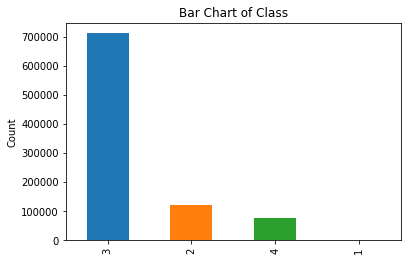

In [33]:
train["Class"].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Bar Chart of Class')

## Bin the target variable for the testing set

In [27]:
print(len(test.loc[(test['inf_adj_salary'] > 0 ) & (test["inf_adj_salary"] <= 10690)]),
      len(test.loc[(test['inf_adj_salary'] > 10690 ) & (test["inf_adj_salary"] <= 42616)]),
      len(test.loc[(test['inf_adj_salary'] > 42616 ) & (test["inf_adj_salary"] <= 95503)]),
        len(test.loc[(test['inf_adj_salary'] > 95503 ) & (test["inf_adj_salary"] <= 159096)]),
        len(test.loc[(test['inf_adj_salary'] > 159096 ) & (test["inf_adj_salary"] <= 307611)]),
        len(test.loc[test['inf_adj_salary'] > 307611]))

486 35128 203305 22092 0 0


In [28]:
# if inf_adj_salary > 0 and <= 10690, Class = 1
test.loc[(test['inf_adj_salary'] > 0 ) & (test["inf_adj_salary"] <= 10690), "Class"] = 1
# if inf_adj_salary > 10690 and <= 42616, Class = 2
test.loc[(test['inf_adj_salary'] > 10690 ) & (test["inf_adj_salary"] <= 42616), "Class"] = 2
# if inf_adj_salary > 42616 and <= 95503, Class = 3
test.loc[(test['inf_adj_salary'] > 42616 ) & (test["inf_adj_salary"] <= 95503), "Class"] = 3
# if inf_adj_salary > 95503 and <= 159096, Class = 4
test.loc[(test['inf_adj_salary'] > 95503 ) & (test["inf_adj_salary"] <= 159096), "Class"] = 4
# if inf_adj_salary > 159096 and <= 307611, Class = 5
test.loc[(test['inf_adj_salary'] > 159096 ) & (test["inf_adj_salary"] <= 307611), "Class"] = 5
# if inf_adj_salary > 307611, Class = 6
test.loc[test['inf_adj_salary'] > 307611, "Class"] = 6

### Double Check the class

In [29]:
print(len(test.loc[test["Class"] == 1]), 
      len(test.loc[test["Class"] == 2]), 
      len(test.loc[test["Class"] == 3]),
      len(test.loc[test["Class"] == 4]),
      len(test.loc[test["Class"] == 5]),
      len(test.loc[test["Class"] == 6]))

486 35128 203305 22092 0 0


Text(0.5,1,'Bar Chart of Class')

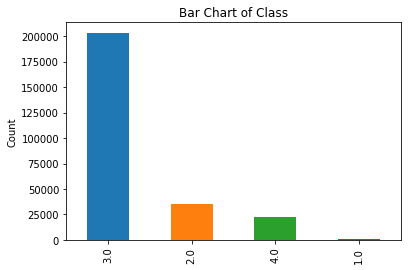

In [34]:
test["Class"].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Bar Chart of Class')

## Bin the target variable for the tuning set

In [30]:
print(len(tune.loc[(tune['inf_adj_salary'] > 0 ) & (tune["inf_adj_salary"] <= 10690)]),
      len(tune.loc[(tune['inf_adj_salary'] > 10690 ) & (tune["inf_adj_salary"] <= 42616)]),
      len(tune.loc[(tune['inf_adj_salary'] > 42616 ) & (tune["inf_adj_salary"] <= 95503)]),
        len(tune.loc[(tune['inf_adj_salary'] > 95503 ) & (tune["inf_adj_salary"] <= 159096)]),
        len(tune.loc[(tune['inf_adj_salary'] > 159096 ) & (tune["inf_adj_salary"] <= 307611)]),
        len(tune.loc[tune['inf_adj_salary'] > 307611]))

224 17380 101822 11051 0 0


In [31]:
# if inf_adj_salary > 0 and <= 10690, Class = 1
tune.loc[(tune['inf_adj_salary'] > 0 ) & (tune["inf_adj_salary"] <= 10690), "Class"] = 1
# if inf_adj_salary > 10690 and <= 42616, Class = 2
tune.loc[(tune['inf_adj_salary'] > 10690 ) & (tune["inf_adj_salary"] <= 42616), "Class"] = 2
# if inf_adj_salary > 42616 and <= 95503, Class = 3
tune.loc[(tune['inf_adj_salary'] > 42616 ) & (tune["inf_adj_salary"] <= 95503), "Class"] = 3
# if inf_adj_salary > 95503 and <= 159096, Class = 4
tune.loc[(tune['inf_adj_salary'] > 95503 ) & (tune["inf_adj_salary"] <= 159096), "Class"] = 4
# if inf_adj_salary > 159096 and <= 307611, Class = 5
tune.loc[(tune['inf_adj_salary'] > 159096 ) & (tune["inf_adj_salary"] <= 307611), "Class"] = 5
# if inf_adj_salary > 307611, Class = 6
tune.loc[tune['inf_adj_salary'] > 307611, "Class"] = 6

### Double Check the class

In [32]:
print(len(tune.loc[tune["Class"] == 1]), 
      len(tune.loc[tune["Class"] == 2]), 
      len(tune.loc[tune["Class"] == 3]),
      len(tune.loc[tune["Class"] == 4]),
      len(tune.loc[tune["Class"] == 5]),
      len(tune.loc[tune["Class"] == 6]))

224 17380 101822 11051 0 0


Text(0.5,1,'Bar Chart of Class')

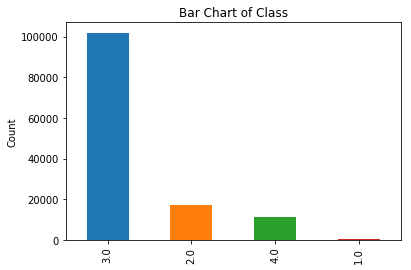

In [35]:
tune["Class"].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Bar Chart of Class')